In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score 
from collections import Counter
from collections import defaultdict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
# datasets
Xtrain = pd.read_csv('.\data\csv_data\X_train.csv')
Xtest = pd.read_csv('.\data\csv_data\X_test.csv')
ytrain = pd.read_csv('.\data\csv_data\y_train.csv')
ytest = pd.read_csv('.\data\csv_data\y_test.csv')
Xtrain_151var = pd.read_csv('.\data\csv_data\TRAINING_SET_DM2.csv')
Xtest_151var = pd.read_csv('.\data\csv_data\TEST_SET_DM2.csv')

In [3]:
# Target variable from integer to categorical
ytrain['Label'] = pd.Categorical(ytrain["Label"])
ytest['Label'] = pd.Categorical(ytest["Label"])

In [4]:
# arrays
X_train = Xtrain.values
X_test = Xtest.values
y_train = ytrain.values
y_test = ytest.values
X_train_151var = Xtrain_151var.values
X_test_151var = Xtest_151var.values

In [5]:
# standardization di X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_151var_scaled = scaler.fit_transform(X_train_151var)
X_test_151var_scaled = scaler.transform(X_test_151var)

# kNN

### 1.1 su X_train (training set originale)

In [7]:
# kNN senza parameter tuning
clf = KNeighborsClassifier() # default k = 5
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.97      0.89       496
           2       0.88      0.90      0.89       471
           3       0.96      0.73      0.83       420
           4       0.88      0.76      0.82       491
           5       0.80      0.93      0.86       532
           6       1.00      0.95      0.97       537

    accuracy                           0.88      2947
   macro avg       0.89      0.87      0.88      2947
weighted avg       0.89      0.88      0.88      2947



#### Parameter tuning

In [14]:
# k folds per cross validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# parametri per grid search
param_list = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}


grid_search = GridSearchCV(clf, param_grid=param_list, cv=kf)
grid_search.fit(X_train_scaled, y_train)

# results of the grid search
res = grid_search.cv_results_

In [15]:
# funzione del tutor per printare i risultati
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [16]:
# best 3 parameter combinations
report(res, n_top=4)

Model with rank: 1
Mean validation score: 0.962 (std: 0.004)
Parameters: {'n_neighbors': 5}

Model with rank: 2
Mean validation score: 0.962 (std: 0.005)
Parameters: {'n_neighbors': 3}

Model with rank: 3
Mean validation score: 0.958 (std: 0.006)
Parameters: {'n_neighbors': 7}

Model with rank: 4
Mean validation score: 0.956 (std: 0.005)
Parameters: {'n_neighbors': 9}



In [17]:
# kNN 
clf = KNeighborsClassifier(n_neighbors = 7) # default k = 5
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.98      0.90       496
           2       0.88      0.91      0.89       471
           3       0.97      0.74      0.84       420
           4       0.89      0.77      0.82       491
           5       0.81      0.94      0.87       532
           6       0.99      0.95      0.97       537

    accuracy                           0.89      2947
   macro avg       0.90      0.88      0.88      2947
weighted avg       0.89      0.89      0.89      2947



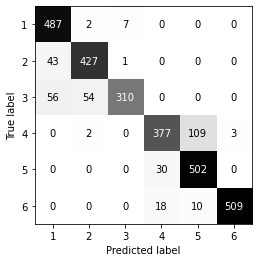

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test_scaled, y_test, cmap='Greys', colorbar=False)

### 1.2 su X_train (training set originale) con PCA

In [23]:
# riduzione dimensionalità a 26 PC
pca = PCA(n_components=26)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)

In [24]:
# percentage of variance explained by the first 26 components
print(sum(pca.explained_variance_ratio_))

0.8017931630563353


In [25]:
# proiezione delle stesse 26 componenti su X_test 
X_test_pca = pca.transform(X_test_scaled)

In [31]:
# kNN senza parameter tuning
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.94      0.87       496
           2       0.86      0.87      0.86       471
           3       0.92      0.72      0.81       420
           4       0.77      0.70      0.74       491
           5       0.75      0.86      0.80       532
           6       1.00      0.93      0.96       537

    accuracy                           0.84      2947
   macro avg       0.85      0.84      0.84      2947
weighted avg       0.85      0.84      0.84      2947



#### Parameter tuning

In [29]:
# k folds per cross validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# parametri per grid search
param_list = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}


grid_search = GridSearchCV(clf, param_grid=param_list, cv=kf)
grid_search.fit(X_train_pca, y_train)

# results of the grid search
res = grid_search.cv_results_

In [30]:
# grid search best 3 results
report(res, n_top=4)

Model with rank: 1
Mean validation score: 0.928 (std: 0.006)
Parameters: {'n_neighbors': 5}

Model with rank: 2
Mean validation score: 0.926 (std: 0.005)
Parameters: {'n_neighbors': 7}

Model with rank: 3
Mean validation score: 0.926 (std: 0.006)
Parameters: {'n_neighbors': 9}

Model with rank: 4
Mean validation score: 0.925 (std: 0.003)
Parameters: {'n_neighbors': 11}



In [32]:
# kNN
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.95      0.87       496
           2       0.86      0.87      0.87       471
           3       0.91      0.71      0.80       420
           4       0.79      0.69      0.74       491
           5       0.75      0.88      0.81       532
           6       1.00      0.93      0.97       537

    accuracy                           0.85      2947
   macro avg       0.85      0.84      0.84      2947
weighted avg       0.85      0.85      0.84      2947



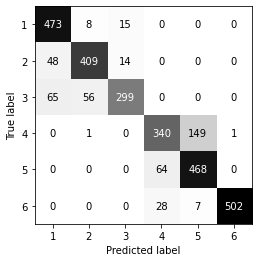

In [33]:
plot_confusion_matrix(clf, X_test_pca, y_test, cmap='Greys', colorbar=False)

### 1.3 su X_train_151var (training set senza variabili correlate)

In [35]:
# kNN senza parameter tuning
clf = KNeighborsClassifier()   # defaulf k=5
clf.fit(X_train_151var_scaled, y_train)

y_pred = clf.predict(X_test_151var_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.99      0.85       496
           2       0.89      0.83      0.86       471
           3       0.97      0.68      0.80       420
           4       0.76      0.76      0.76       491
           5       0.78      0.89      0.83       532
           6       0.99      0.84      0.91       537

    accuracy                           0.84      2947
   macro avg       0.86      0.83      0.84      2947
weighted avg       0.85      0.84      0.84      2947



#### Parameter tuning

In [38]:
# grid search con stessi parametri di prima tra cui scegliere 
grid_search = GridSearchCV(clf, param_grid=param_list, cv=kf)
grid_search.fit(X_train_151var_scaled, y_train)

# results of the grid search
res = grid_search.cv_results_

In [39]:
# grid search best 3 results
report(res, n_top=4)

Model with rank: 1
Mean validation score: 0.946 (std: 0.007)
Parameters: {'n_neighbors': 3}

Model with rank: 2
Mean validation score: 0.939 (std: 0.004)
Parameters: {'n_neighbors': 5}

Model with rank: 2
Mean validation score: 0.939 (std: 0.005)
Parameters: {'n_neighbors': 7}

Model with rank: 4
Mean validation score: 0.936 (std: 0.003)
Parameters: {'n_neighbors': 9}



In [43]:
# DT con parameter tuning (Model with rank: 1)
clf = KNeighborsClassifier(n_neighbors = 7) 
clf.fit(X_train_151var_scaled, y_train)

y_pred = clf.predict(X_test_151var_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.99      0.85       496
           2       0.88      0.83      0.85       471
           3       0.97      0.67      0.79       420
           4       0.77      0.76      0.77       491
           5       0.78      0.91      0.84       532
           6       0.99      0.83      0.90       537

    accuracy                           0.84      2947
   macro avg       0.86      0.83      0.83      2947
weighted avg       0.85      0.84      0.84      2947



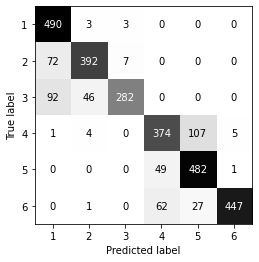

In [45]:
plot_confusion_matrix(clf, X_test_151var_scaled, y_test, cmap='Greys', colorbar=False)

### 1.4 su X_train_151var (training set senza variabili correlate) con PCA

In [47]:
# riduzione dimensionalità a 51 PC
pca = PCA(n_components=51)
pca.fit(X_train_151var_scaled)
X_train_151var_pca = pca.transform(X_train_151var_scaled)

In [48]:
# percentage of variance explained by the first 51 components
print(sum(pca.explained_variance_ratio_))

0.8010816037208113


In [50]:
# proiezione delle stesse 51 componenti su X_test_151var 
X_test_151var_pca = pca.transform(X_test_151var_scaled)

In [51]:
# kNN senza parameter tuning
clf = KNeighborsClassifier(n_neighbors = 5) 
clf.fit(X_train_151var_pca, y_train)

y_pred = clf.predict(X_test_151var_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.98      0.85       496
           2       0.88      0.79      0.83       471
           3       0.93      0.72      0.81       420
           4       0.73      0.71      0.72       491
           5       0.75      0.88      0.81       532
           6       0.98      0.82      0.90       537

    accuracy                           0.82      2947
   macro avg       0.84      0.82      0.82      2947
weighted avg       0.83      0.82      0.82      2947



#### Parameter tuning

In [54]:
# grid search con stessi parametri di prima tra cui scegliere 
grid_search = GridSearchCV(clf, param_grid=param_list, cv=kf)
grid_search.fit(X_train_151var_pca, y_train)

# results of the grid search
res = grid_search.cv_results_

In [55]:
# grid search best 3 results
report(res, n_top=3)

Model with rank: 1
Mean validation score: 0.924 (std: 0.008)
Parameters: {'n_neighbors': 3}

Model with rank: 2
Mean validation score: 0.923 (std: 0.007)
Parameters: {'n_neighbors': 5}

Model with rank: 2
Mean validation score: 0.923 (std: 0.008)
Parameters: {'n_neighbors': 7}



In [56]:
# kNN con parameter tuning 
clf = KNeighborsClassifier(n_neighbors = 3) 
clf.fit(X_train_151var_pca, y_train)

y_pred = clf.predict(X_test_151var_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.96      0.84       496
           2       0.89      0.78      0.83       471
           3       0.89      0.74      0.81       420
           4       0.69      0.69      0.69       491
           5       0.75      0.85      0.80       532
           6       0.97      0.81      0.88       537

    accuracy                           0.81      2947
   macro avg       0.82      0.81      0.81      2947
weighted avg       0.82      0.81      0.81      2947



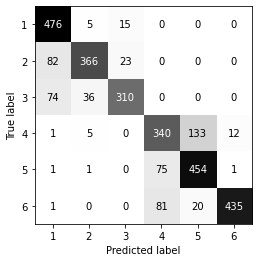

In [57]:
plot_confusion_matrix(clf, X_test_151var_pca, y_test, cmap='Greys', colorbar=False)